# Chapter4 確率モデル

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 簡単なシミュレーション例

### 大数の法則と中心極限定理

$X_1$, $X_2$, ... ~ 平均$\mu$の独立な確率分布、独立として  
$$\bar X_n = \frac{1}{n}(X_1 + \cdots + X_n) \qquad (n \ge 1)$$  

この時、次が成り立つ：  
$$\lim_{n \rightarrow \infty} P(|\bar X_n - \mu| > \epsilon) = 0 \qquad (\forall \epsilon > 0)$$

In [2]:
nsample = 1000
x = np.zeros((4, 2, nsample))

for k in range(nsample):
    x[0, 0, k] = scipy.stats.uniform.rvs(loc=0, scale=2, size=1) # mu=1
    x[1, 0, k] = scipy.stats.norm.rvs(loc=2, scale=1, size=1)     # mu=2
    x[2, 0, k] = scipy.stats.binom.rvs(n=10, p=0.3, size=1)       # mu=3
    x[3, 0, k] = scipy.stats.poisson.rvs(mu=4, size=1)                # mu=4
    
    for i in range(4):
        if k >= 1:
            x[i, 1, k] = np.mean(x[i, 0, 0:k])

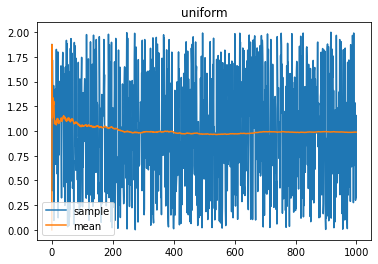

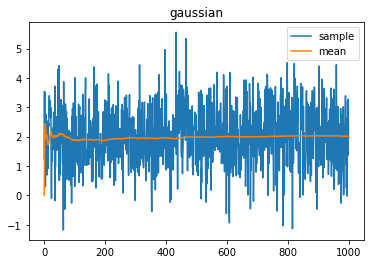

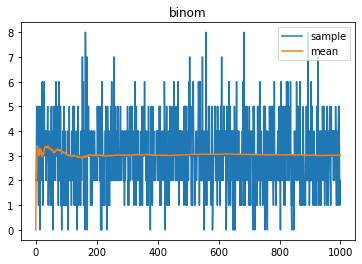

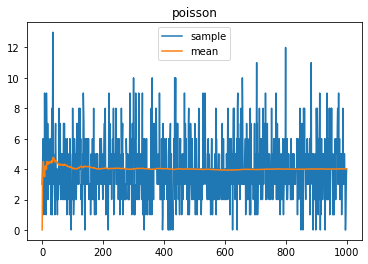

In [3]:
names = ["uniform", "gaussian", "binom", "poisson"]
for i in range(4):
    plt.plot(x[i, 0], label="sample")
    plt.plot(x[i, 1], label="mean")
    plt.title(names[i])
    plt.legend()
    plt.show()

$X_1$, $X_2$, ... ~ 平均$\mu$、分散$\sigma^2$の独立な確率分布、独立として  
$$\bar X_n = \frac{1}{n}(X_1 + \cdots + X_n) \qquad (n \ge 1)$$  

この時、次が成り立つ：  
$$\bar X_n の分布は正規分布N(\mu, \sigma^2/n)に近づく \qquad (n \rightarrow \infty) $$

In [4]:
n1, n2 = 100, 2000
nsample = 1000
x1 = np.zeros(nsample)
x2 = np.zeros(nsample)

for k in range(nsample):
    x1[k] = np.mean(scipy.stats.poisson.rvs(mu=4, size=n1))
    x2[k] = np.mean(scipy.stats.poisson.rvs(mu=4, size=n2))

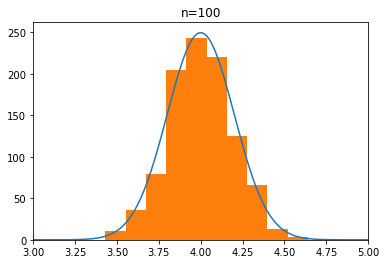

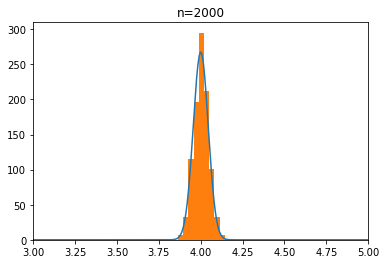

In [5]:
x = np.linspace(-3, 5, 1000)
def gaussian(x, mu, sigma2):
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-(x-mu)**2 / (2*sigma2))
plt.plot(x, gaussian(x, 4, 4/n1)*125) # 125はテキトー
plt.hist(x1, bins=10)
plt.xlim(3,5)
plt.title(f"n={n1}")
plt.show()
plt.plot(x, gaussian(x, 4, 4/n2)*30) # 30はテキトー
plt.hist(x2, bins=10)
plt.xlim(3,5)
plt.title(f"n={n2}")
plt.show()

### ランダムウォーク(1次元、3次元)

$X_i (i=1, 2, ...)$をi.i.d.とする。次をランダムウォークという。  
$$S_n = X_1 + \cdots X_n$$

特に確率分布を次とするとき、単純ランダムウォークという。  
$$P(X=1) = p \quad P(X=-1) = 1-p$$

In [6]:
num = 4000
p = 0.6 # 非対称ランダムウォーク
s = np.zeros(num+1)

for k in range(1, num+1):
    x = 1
    if np.random.rand() > p:
        x = -1
    s[k] = s[k-1] + x

1歩移動する時、期待値は
$$ E[X] = (+1)\cdot p + (-1) \cdot (1 - p) = 2p -1$$
$n$歩移動する時は$n(2p-1)$, 今回の例では$0.2n$になる

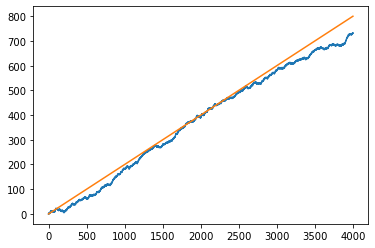

In [7]:
plt.plot(s)
plt.plot([0, 4000], [0, 4000*0.2]) # 期待値
plt.show()

<IPython.core.display.Javascript object>


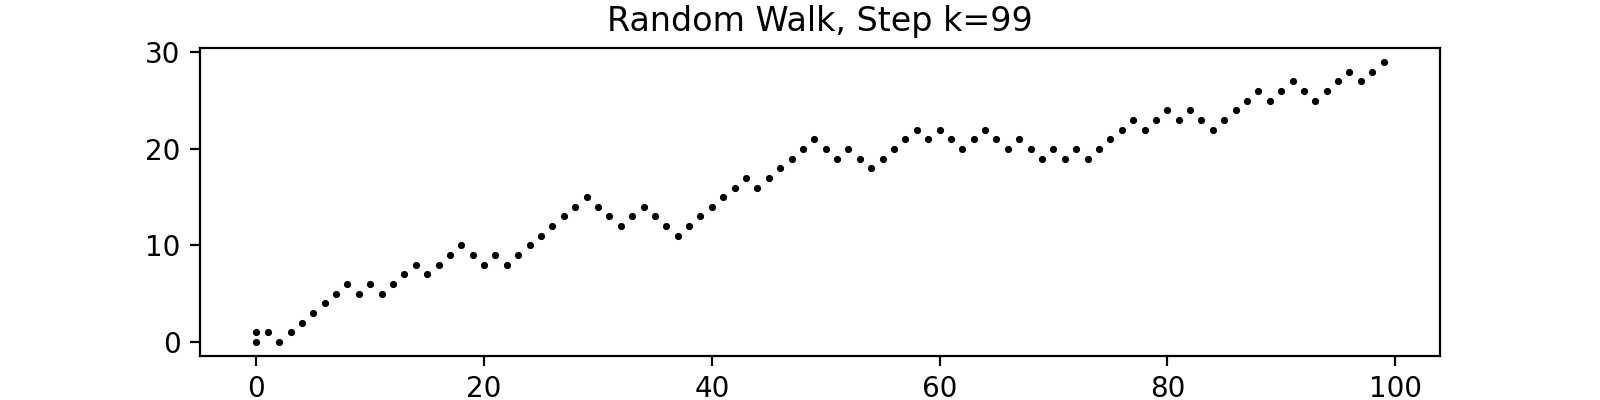

In [8]:
%matplotlib nbagg
# ランダムウォークのアニメーション(期待値=0)
fig = plt.figure(figsize=(8, 2))
v = 0

def update(k, fig_title, num):
    global v
    h = 1
    if np.random.rand() > 0.5:
        h = -1
    v += h
    plt.scatter(k, v, c='k', s=10, marker='.')
    plt.title(f"{fig_title}Step k={k}")
    
num = 100
ani = animation.FuncAnimation(fig, update, 
                             fargs=('Random Walk, ', num), 
                             interval=10, frames=num, repeat=False)

<IPython.core.display.Javascript object>


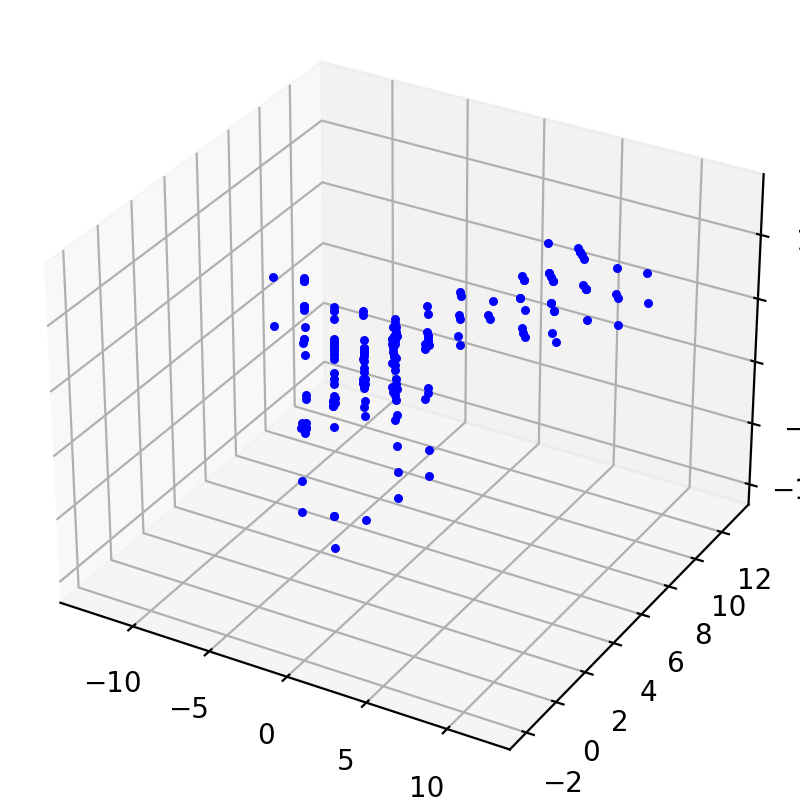

In [9]:
# 3次元ランダムウォークのアニメーション
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(4, 4), constrained_layout=True)
ax = Axes3D(fig2)

v = np.zeros(3)

def update3D(k, fig_title, dst):
    global v
    for i in range(3):
        h = 1
        if np.random.rand() > 0.5:
            h = -1
        v[i] += h
    
    ax.set_title(f"{fig_title}Step k={k}")
    ax.scatter(v[0], v[1], v[2], c='b', s=5)
    
    
num = 200
ani = animation.FuncAnimation(fig2, update3D, 
                             fargs=('Random Walk, ', 1.0), 
                             interval=5, frames=num, repeat=False)

### モンテカルロ法による円周率計算

半径1の円の面積=$\pi$  
区間[-1, 1]の一様乱数のペア$(x, y)$を$N$ペア生成し　　
$$x^2 + y^2 \leq 1$$
となるペア数をcountとする時
$$pi = \frac{4 \cdot count}{N}$$
として計算する  
これは一辺の長さが2の正方形と半径1の円の面積比を考えることに対応している 　

<IPython.core.display.Javascript object>


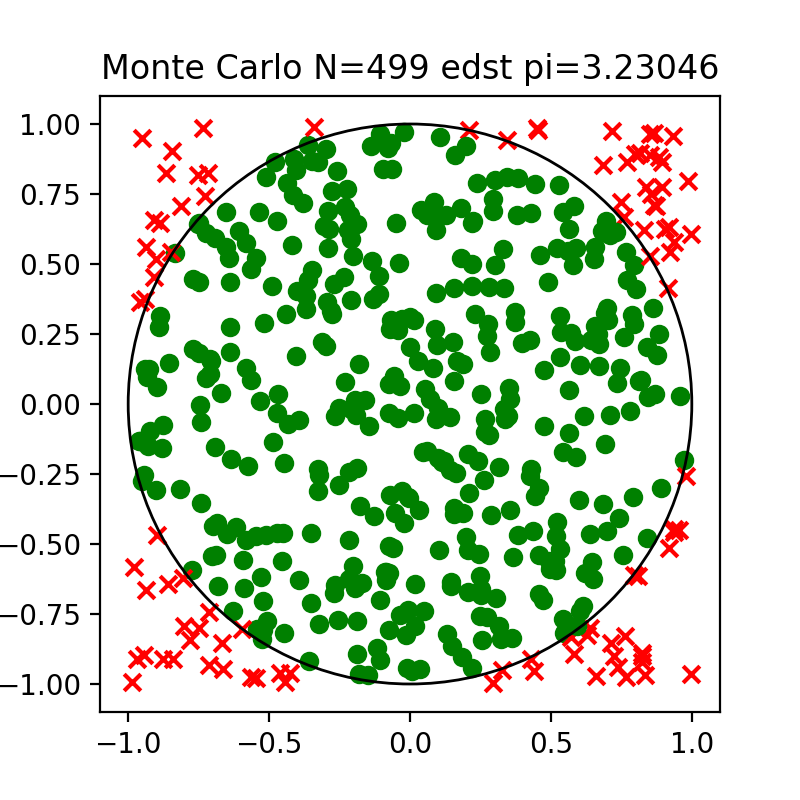

In [10]:
import matplotlib.patches as pat

fig, ax = plt.subplots(figsize=(4, 4))
ucircle = pat.Circle(xy=(0.0, 0.0), radius=1.0, edgecolor='black', fill=False)
ax.add_patch(ucircle)

count = 0

def func_pi(N, fig_title, dummy):
    global count
    x, y = np.random.uniform(low=-1, high=1, size=2)
    judge = x**2 + y**2 <= 1.0
    if judge:
        plt.scatter(x, y, marker='o', color='green')
    else:
        plt.scatter(x, y, marker='x', color='red')
    count += judge
    pi_est = 4*count / N
    
    plt.title(fig_title+' N='+str(N)+' edst pi='+f"{pi_est:1.5f}")
    
ani = animation.FuncAnimation(fig, func_pi, 
                             fargs=("Monte Carlo", 1.0), 
                             interval=10, frames=500, repeat=False)

In [11]:
%%timeit -r 3 -n 1 # 3回計測、各回1回実行
# Numpy ver. 速い
N = 10**8
x, y = np.random.uniform(low=-1, high=1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum() * (4 / np.float(N))
print(f"N={N} Calculation pi={pi}")

N=100000000 Calculation pi=3.1417280400000003
N=100000000 Calculation pi=3.14162924
N=100000000 Calculation pi=3.1414344
4.14 s ± 761 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
